<a href="https://colab.research.google.com/github/Avenge2766/AutoEnc/blob/master/enc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras

In [0]:
keras.__version__

'2.2.5'

In [0]:
from keras.models import Input,Sequential

In [0]:
from keras.layers import Dense

In [0]:
from keras.models import Model

In [0]:
input_img = Input(shape=(784,))

In [0]:
middle_enc = 32

In [0]:
enc = Dense(middle_enc, activation='relu')(input_img)

In [0]:
dec = Dense(784, activation = 'sigmoid')(enc)

In [0]:
model1 = Model(input_img, dec)

In [0]:
encoder = Model(input_img, enc)

In [0]:
encoded_input = Input(shape = (middle_enc,))

In [0]:
decode_layer = model1.layers[-1]

In [0]:
decoder = Model(encoded_input, decode_layer(encoded_input))

In [0]:
model1.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train.astype('float32')/255 + 0.0015
x_test = x_test.astype('float32')/255 + 0.0015
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

In [0]:
model1.fit(x_train, x_train, epochs=45, batch_size=256,shuffle = True, validation_data=(x_test,x_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/45
 - 4s - loss: 0.3606 - val_loss: 0.2771
Epoch 2/45
 - 3s - loss: 0.2711 - val_loss: 0.2617
Epoch 3/45
 - 4s - loss: 0.2512 - val_loss: 0.2387
Epoch 4/45
 - 3s - loss: 0.2306 - val_loss: 0.2204
Epoch 5/45
 - 3s - loss: 0.2153 - val_loss: 0.2078
Epoch 6/45
 - 3s - loss: 0.2044 - val_loss: 0.1985
Epoch 7/45
 - 3s - loss: 0.1959 - val_loss: 0.1907
Epoch 8/45
 - 3s - loss: 0.1888 - val_loss: 0.1841
Epoch 9/45
 - 3s - loss: 0.1824 - val_loss: 0.1783
Epoch 10/45
 - 4s - loss: 0.1768 - val_loss: 0.1729
Epoch 11/45
 - 3s - loss: 0.1719 - val_loss: 0.1684
Epoch 12/45
 - 3s - loss: 0.1675 - val_loss: 0.1643
Epoch 13/45
 - 3s - loss: 0.1635 - val_loss: 0.1605
Epoch 14/45
 - 3s - loss: 0.1599 - val_loss: 0.1570
Epoch 15/45
 - 3s - loss: 0.1565 - val_loss: 0.1537
Epoch 16/45
 - 3s - loss: 0.1534 - val_loss: 0.1507
Epoch 17/45
 - 3s - loss: 0.1505 - val_loss: 0.1478
Epoch 18/45
 - 3s - loss: 0.1477 - val_loss: 0.1451
Epoch 19/45
 - 3s - los

In [0]:
enc_images = encoder.predict(x_test)
dec_images = decoder.predict(enc_images)

In [0]:
import matplotlib.pyplot as plt

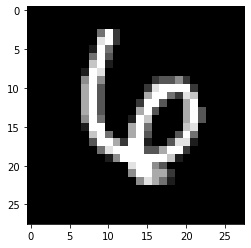

In [0]:
plt.imshow(x_test[22].reshape(28,28))

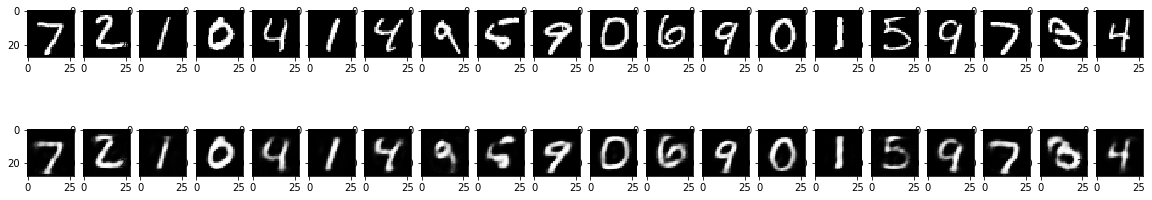

In [0]:
plt.figure(figsize=(20,4))
for i in range(20):
  plt.subplot(2, 20, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()


  plt.subplot(2, 20, i+1+20)
  plt.imshow(dec_images[i].reshape(28,28))
  plt.gray()